In [75]:
import requests # Downloads compressed dataset
import zipfile # Extracting Dataset
import os #For path
from PIL import Image # For Image Transformation
import matplotlib.pyplot as plt # For displaying images
import numpy as np # Array Manipulation
#Contains ML-Algorithms
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import confusion_matrix
import seaborn as sns # For heatmap plottings
import joblib # For saving our ML-Model

np.random.seed(42)

In [1]:
# For downloading zip file

In [5]:
def download(url, file_name):
    
    response = requests.get(url, stream = True)
    if response.status_code == 200:
        with open(file_name, 'wb') as f:
            f.write(response.raw.read())

In [ ]:
# For extracting zip file

In [6]:
def extract_zip(s_path, d_path):
    with zipfile.ZipFile(s_path,'r') as zip_ref:
        zip_ref.extractall(d_path)

In [2]:
# To crop any image from centre about the given size

In [7]:
def center_crop(image_path, size):
  
  img = Image.open(image_path)
  img = img.resize((size+1,size+1))
  x_center = img.width/2
  y_center = img.height/2
  size = size/2
  cr = img.crop((x_center-size, y_center-size, x_center+size, y_center+size))

  return cr

In [5]:
download("https://s3.amazonaws.com/content.udacity-data.com/nd089/Cat_Dog_data.zip", "images.zip")

In [ ]:
extract_zip("images.zip", "images")

In [8]:
img = Image.open("./images/Cat_Dog_data/train/dog/dog.0.jpg")
img.format, type(img)

('JPEG', PIL.JpegImagePlugin.JpegImageFile)

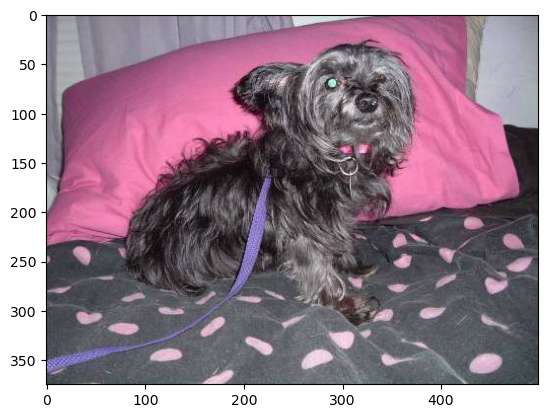

In [9]:
plt.imshow(img)

In [10]:
cat_list = os.listdir("./images/Cat_Dog_data/train/cat")
dog_list = os.listdir("./images/Cat_Dog_data/train/dog")

In [11]:
cat_list = cat_list[:5000]
dog_list = dog_list[:5000]

In [12]:
len(cat_list), len(dog_list)

(5000, 5000)

In [13]:
train_list = []
train_list.extend(cat_list)
train_list.extend(dog_list)

In [14]:
np.random.shuffle(train_list)

In [16]:
train_list[:15]

['dog.11247.jpg',
 'cat.3433.jpg',
 'cat.11724.jpg',
 'cat.3491.jpg',
 'cat.3267.jpg',
 'dog.11334.jpg',
 'cat.10580.jpg',
 'dog.10206.jpg',
 'dog.11357.jpg',
 'cat.1044.jpg',
 'cat.1500.jpg',
 'dog.12489.jpg',
 'dog.10274.jpg',
 'dog.10651.jpg',
 'cat.2747.jpg']

In [17]:
train_data = np.zeros((10000,100*100*3))

In [3]:
#For each, cropping image in 100*100 size.
#Then converting PIL object into numpy array

In [18]:
for i , image_name in enumerate(train_list):
    if ".ipynb_checkpoints" in image_name:
        continue
        
    if image_name.split(".")[0] == "dog":
        path = "./images/Cat_Dog_data/train/dog"
    else:
        path = "./images/Cat_Dog_data/train/cat"
    image_path = f'{path}/{image_name}'
    crp_img = center_crop(image_path,100)
    crp_arr = np.array(crp_img).reshape(-1)
    train_data[i] = crp_arr

In [19]:
train_data[0]

array([246., 244., 250., ...,  10.,  14.,  15.])

In [ ]:
'''
Every pixel value ranges from 0-255
By Dividing training data values by 255, We can scale it between 0 and 1
'''

In [20]:
train_data = train_data/255

In [21]:
train_data[0]

array([0.96470588, 0.95686275, 0.98039216, ..., 0.03921569, 0.05490196,
       0.05882353])

In [22]:
print("Name of some Image")
print("->", train_list[6445])

Name of some Image
-> cat.216.jpg


In [23]:
print("Splitting the image from all . characters into a list")
print("->",train_list[6445].split("."))

Splitting the image from all . characters into a list
-> ['cat', '216', 'jpg']


In [24]:
print("Selecting 1st element of the splited list")
print("-> ",train_list[6445].split(".")[0])

Selecting 1st element of the splited list
->  cat


In [25]:
train_labels = np.array([0 if name.split(".")[0] == "cat" else 1 for name in train_list])

In [26]:
train_labels.shape

(10000,)

In [ ]:
'''
Logistic Regression
'''

In [27]:
model = LogisticRegression(max_iter=100, n_jobs=-1)

In [28]:
model.fit(train_data, train_labels)

LogisticRegression(n_jobs=-1)

In [76]:
model_filename = 'model.pkl'
joblib.dump(model, model_filename)

['model.pkl']

In [30]:
model.score(train_data, train_labels)

0.7533

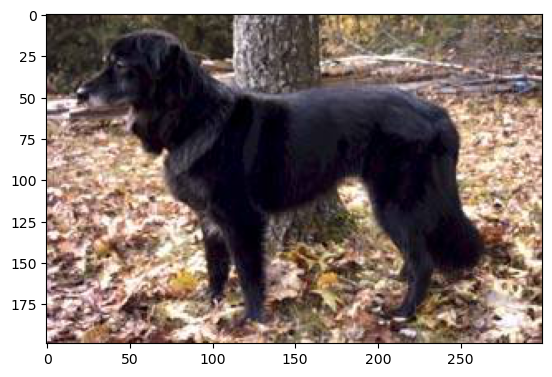

In [36]:
test_img = "./images/Cat_Dog_data/test/dog/dog.1011.jpg"
img = Image.open(test_img)
plt.imshow(img)

In [37]:
im = center_crop(test_img,100)
X = np.array(im).reshape(-1)
X = X/255

In [38]:
model.predict([X])

array([1])

In [39]:
train_pred = model.predict(train_data)
cm = confusion_matrix(train_pred, train_labels)
cm

array([[3820, 1288],
       [1179, 3713]], dtype=int64)

<Axes: >

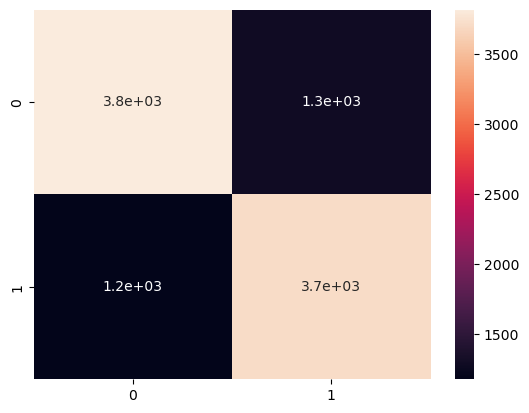

In [40]:
sns.heatmap(cm, annot= True)

In [41]:
test_data_cat = os.listdir("./images/Cat_Dog_data/test/cat")
test_data_dog = os.listdir("./images/Cat_Dog_data/test/dog")

In [42]:
test_data_cat = test_data_cat[:200]
test_data_dog = test_data_dog[:200]

In [43]:
test_list = []
test_list.extend(test_data_cat)
test_list.extend(test_data_dog)

In [44]:
len(test_list)

400

In [49]:
test_data = np.zeros((400, 100*100*3))

In [50]:
for i , image_name in enumerate(test_list):
    if ".ipynb_checkpoints" in image_name:
        continue
        
    if image_name.split(".")[0] == "dog":
        path =  "./images/Cat_Dog_data/test/dog"
    else:
        path = "./images/Cat_Dog_data/test/cat"
    image_path = f'{path}/{image_name}'
    crp_img = center_crop(image_path,100)
    crp_arr = np.array(crp_img).reshape(-1)
    test_data[i] = crp_arr

In [51]:
test_data = test_data/255

In [53]:
test_labels = np.array([0 if name.split(".")[0]=="cat" else 1 for name in test_list])

[[110  80]
 [ 90 120]]


<Axes: >

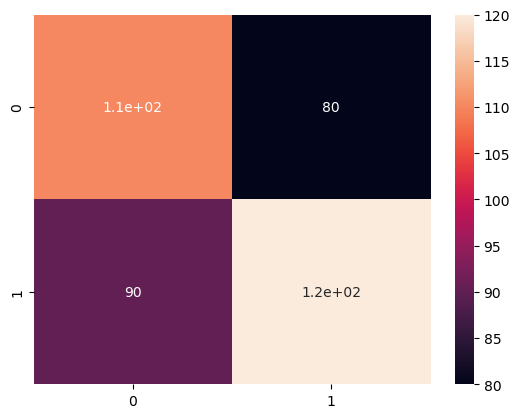

In [54]:
pred = model.predict(test_data)
cm = confusion_matrix(pred, test_labels)
print(cm)
sns.heatmap(cm, annot = True)

In [55]:
test_acc = model.score(test_data, test_labels)
print("Accuracy on test set: ",test_acc)

Accuracy on test set:  0.575


In [73]:
def show_img(img_path):
    img = Image.open(img_path)
    plt.imshow(img)

In [64]:
def predict_custom_image(model, img_path):
    crp_img = center_crop(img_path, 100)
    crp_arr = np.array(crp_img).reshape(1,-1)
    pred = model.predict(crp_arr)
    if pred == 0:
        return "Cat"
    else:
        return "Dog"

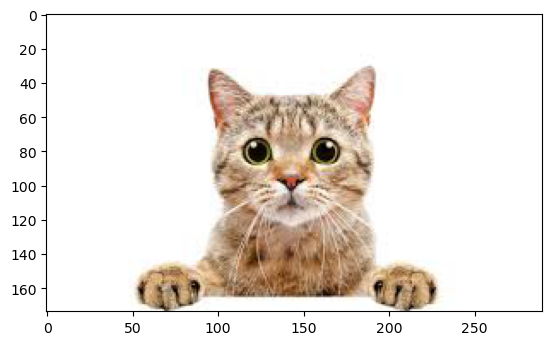

In [71]:
test_img_path = "test.jpeg"
show_img(test_img_path)

In [72]:
predict_custom_image(model, test_img_path)

'Cat'